# %B Indicator

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:bollinger_band_perce

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [4]:
# input
symbol = '^NSEBANK'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500


In [5]:
import talib as ta

upper, middle, lower = ta.BBANDS(df['Adj Close'])

In [6]:
# Create %B Indicator
df['BI'] = (df['Adj Close'] - lower)/(upper - lower)

In [7]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,BI
Date,,,,,,,
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,0.323623
2020-01-09 00:00:00+05:30,31748.250000,32172.699219,31667.150391,32092.400391,32092.027344,308000,0.810529
2020-01-10 00:00:00+05:30,32215.699219,32347.199219,31953.400391,32097.400391,32097.027344,444700,0.804528
2020-01-13 00:00:00+05:30,32139.099609,32322.650391,32074.050781,32177.650391,32177.277344,291400,0.741467
2020-01-14 00:00:00+05:30,32196.449219,32196.449219,31989.199219,32071.650391,32071.277344,438900,0.591942


Text(0.5, 0, 'Date')

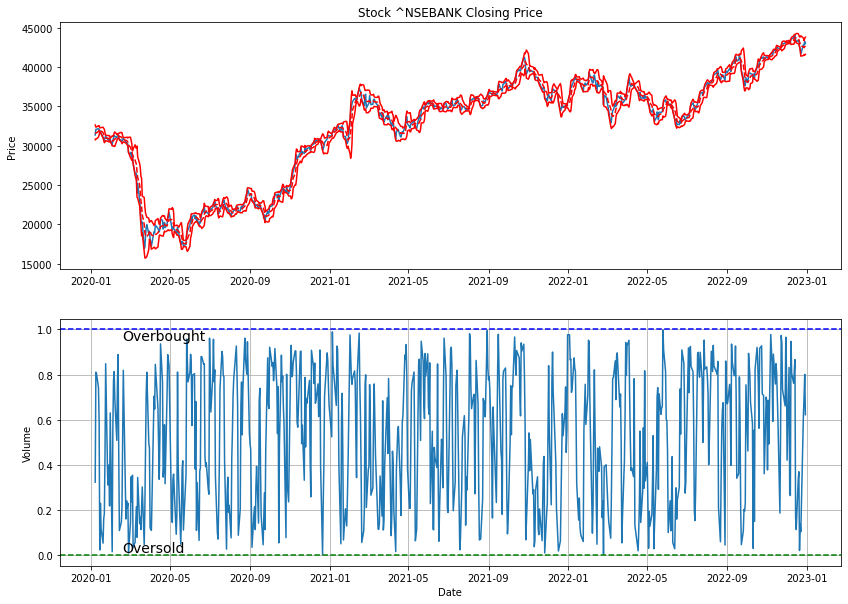

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.plot(upper, color='red')
ax1.plot(middle, color='red', linestyle='--')
ax1.plot(lower, color='red')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['BI'], label='%B Indicator')
ax2.text(s='Overbought', x=df.index[30], y=1, fontsize=14, verticalalignment='top')
ax2.text(s='Oversold', x=df.index[30], y=0, fontsize=14, verticalalignment='bottom')
ax2.axhline(y=1, color='blue', linestyle='--')
ax2.axhline(y=0, color='green', linestyle='--')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

## Candlestick with %B Indicator

In [9]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,BI,VolumePositive
0,18268.770833,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,0.323623,True
1,18269.770833,31748.250000,32172.699219,31667.150391,32092.400391,32092.027344,308000,0.810529,True
2,18270.770833,32215.699219,32347.199219,31953.400391,32097.400391,32097.027344,444700,0.804528,False
3,18273.770833,32139.099609,32322.650391,32074.050781,32177.650391,32177.277344,291400,0.741467,True
4,18274.770833,32196.449219,32196.449219,31989.199219,32071.650391,32071.277344,438900,0.591942,False


Text(0.5, 0, 'Date')

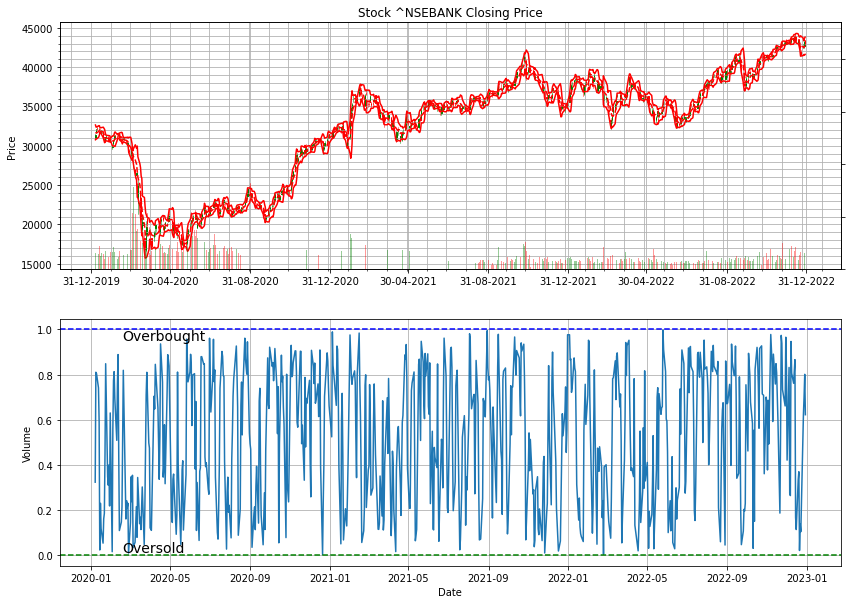

In [11]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(upper, color='red')
ax1.plot(middle, color='red', linestyle='--')
ax1.plot(lower, color='red')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['BI'], label='%B Indicator')
ax2.text(s='Overbought', x=df.index[30], y=1, fontsize=14, verticalalignment='top')
ax2.text(s='Oversold', x=df.index[30], y=0, fontsize=14, verticalalignment='bottom')
ax2.axhline(y=1, color='blue', linestyle='--')
ax2.axhline(y=0, color='green', linestyle='--')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')